# Data Exploration

In [1]:
import pickle
import numpy as np
import PIL
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

from keras.utils import to_categorical,np_utils
import pandas as pd
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [2]:
path = "../../data/"
num_classes = 4
batch_size = 64
epochs = 50
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

In [3]:
#loading the data from the pickle files
with open(path + 'train_image.pkl', 'rb') as f:
    X = np.array(pickle.load(f))

with open(path + 'train_label.pkl', 'rb') as f:
    y = np.array(pickle.load(f))

with open(path + 'test_image.pkl', 'rb') as f:
    X_test = np.array(pickle.load(f))    

In [4]:
#Normalize data
X = X / 255
X_test = X_test / 255

#reshaping the flattened images to images of dimension (28,28,1)
X = np.reshape(X,(len(X),28,28,1))
X_test = np.reshape(X_test,(len(X_test),28,28,1))

In [5]:
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Unique labels:",unique_elements,"\nFrequency of each label",counts_elements)

Unique labels: [0 2 3 6] 
Frequency of each label [2000 2000 2000 2000]


In [6]:
#defining new labels so that the labels are successive integers
label_mapping = {0:0,2:1,3:2,6:3}

for x in label_mapping.keys():
    y = np.where(y==x, label_mapping[x], y)


In [7]:
unique_elements, counts_elements = np.unique(y, return_counts=True)
print(unique_elements,counts_elements)

[0 1 2 3] [2000 2000 2000 2000]


In [8]:
#converting to one hot encodings
y = to_categorical(np.array(y))
print(y)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

In [10]:
X_train.shape,y_train.shape

((6400, 28, 28, 1), (6400, 4))

In [11]:
X[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.00392157],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.16078431],
        [0.7372549 ],
        [0.40392157],
        [0.21176471],
        [0.18823529],
        [0.16862745],
        [0.34117647],
        [0.65882353],
        [0.52156863],
        [0.0627451 ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.00392157],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.19215686],
        [0.53333333],
        [0.85882353],
        [0.84705882],
        [0.89411765],
        [0.9254902 ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        

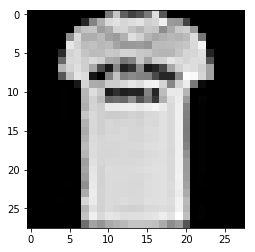

In [12]:
plt.imshow(np.reshape(X_train[3],(28,28)), cmap=plt.get_cmap('gray'))

# A Basic Model

In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
__________

In [15]:
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))


Instructions for updating:
Use tf.cast instead.
Train on 6400 samples, validate on 1600 samples
Epoch 1/50
6400/6400 [==============================] - 7s 1ms/step - loss: 0.8813 - acc: 0.5977 - val_loss: 0.6856 - val_acc: 0.6913
Epoch 2/50
6400/6400 [==============================] - 6s 886us/step - loss: 0.6580 - acc: 0.7092 - val_loss: 0.6107 - val_acc: 0.7425
Epoch 3/50
6400/6400 [==============================] - 6s 886us/step - loss: 0.5787 - acc: 0.7534 - val_loss: 0.5225 - val_acc: 0.7831
Epoch 4/50
6400/6400 [==============================] - 6s 903us/step - loss: 0.5177 - acc: 0.7841 - val_loss: 0.4761 - val_acc: 0.8144
Epoch 5/50
6400/6400 [==============================] - 6s 896us/step - loss: 0.4795 - acc: 0.8064 - val_loss: 0.4549 - val_acc: 0.8281
Epoch 6/50
6400/6400 [==============================] - 6s 898us/step - loss: 0.4566 - acc: 0.8172 - val_loss: 0.4343 - val_acc: 0.8269
Epoch 7/50
6400/6400 [==============================] - 7s 1ms/step - loss: 0.4323 - acc: 

In [16]:
score = model.evaluate(X_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.37624315232038497
Test accuracy: 0.879375
